In [1]:
import plotastic as plst
import matplotlib.pyplot as plt

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

#! You chose this color palette: ['#db5f57', '#91db57', '#57d3db', '#db5f57', '#91db57', '#57d3db', '#db5f57', '#91db57']


['#db5f57',
 '#91db57',
 '#57d3db',
 '#db5f57',
 '#91db57',
 '#57d3db',
 '#db5f57',
 '#91db57']

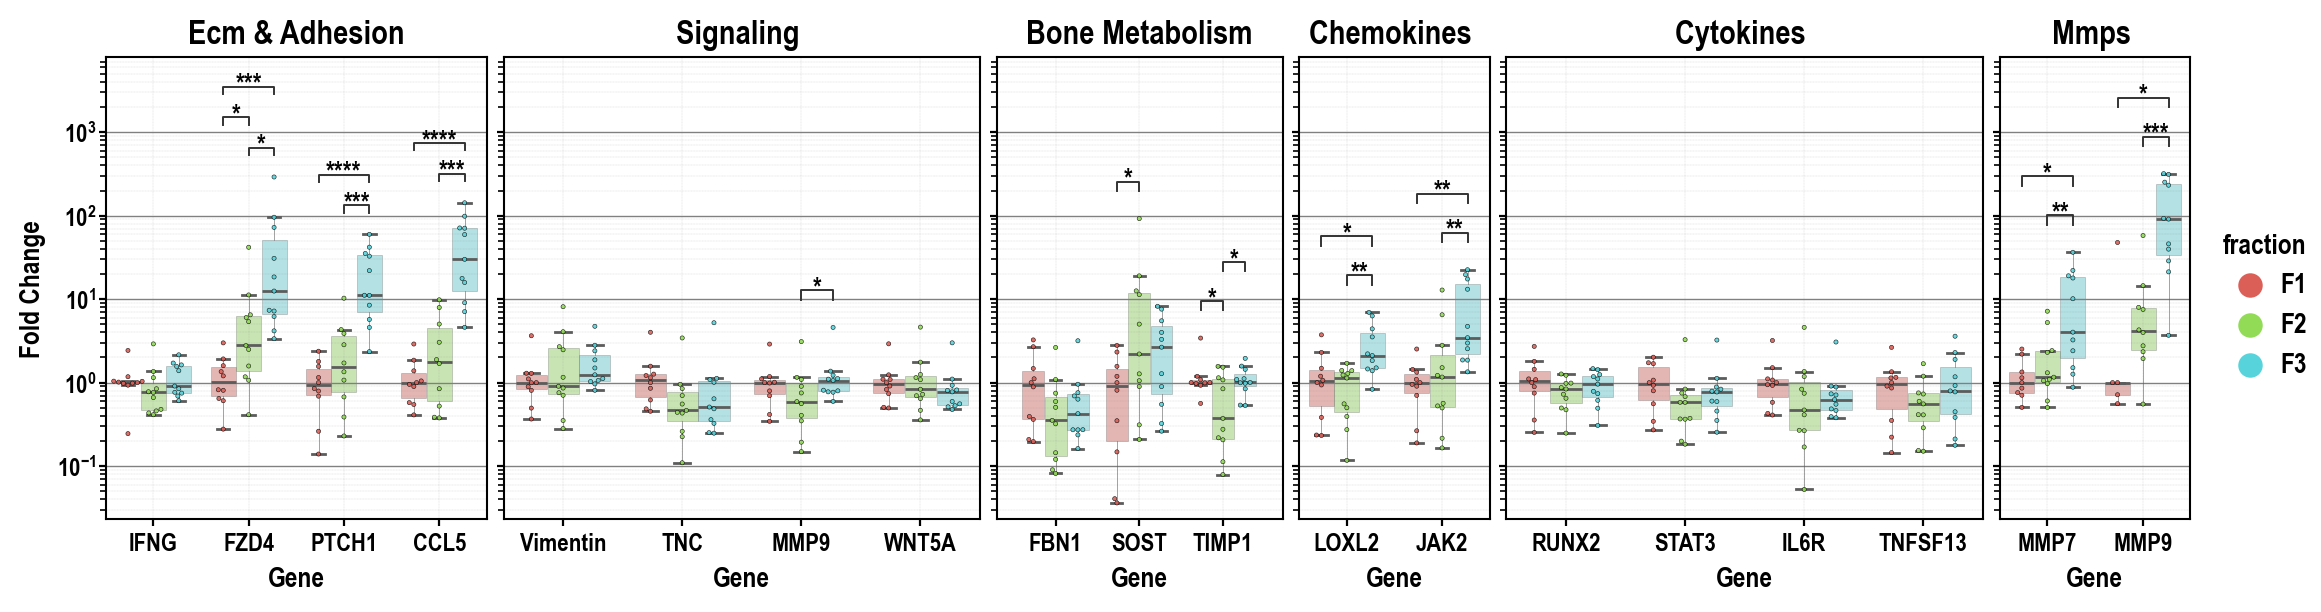

In [4]:
# Import Example Data
DF, _dims = plst.load_dataset("qpcr", verbose=False)
dims = dict(
    y="fc",
    x="gene",
    hue="fraction",
    # col= 'method',
    row="class",
)
DA = plst.DataAnalysis(DF, dims, subject="subject", verbose=False)

# Colors
plst.set_palette(["#db5f57", "#91db57", "#57d3db"], verbose=True)

# Log transform & Statistics
DA.transform_y("log10", inplace=True)
DA.test_pairwise()  # default t-test, and since subject: paired=True

# Plot
(
    DA.switch("row", "col", verbose=False)
    .set(y="fc", inplace=False)  # set y back to to fc to display non-log values
    .plot_box_swarm(
        subplot_kws=dict(figsize=(12, 3), width_ratios=[4, 5, 3, 2, 5, 2]),
    )
    .edit_grid()
    .edit_y_ticklabel_percentage()
    .edit_y_scale_log(10)
    .edit_xy_axis_labels(y="Fold Change", x="Gene")
    .annotate_pairwise(include="__HUE")
)

plt.savefig("qpcr1.png", dpi=300, bbox_inches="tight")